In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df=pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [89]:
print(df.shape)
print(df.columns.tolist())

(300153, 12)
['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [90]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [91]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [93]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [94]:
df.duplicated().sum()

np.int64(0)

In [95]:
for i in df.columns:
  print(f'Unique values in {i}: {df[i].nunique()}')
  print(df[i].unique(),'\n')

Unique values in airline: 6
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India'] 

Unique values in flight: 1561
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433'] 

Unique values in source_city: 6
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'] 

Unique values in departure_time: 6
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'] 

Unique values in stops: 3
['zero' 'one' 'two_or_more'] 

Unique values in arrival_time: 6
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night'] 

Unique values in destination_city: 6
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi'] 

Unique values in class: 2
['Economy' 'Business'] 

Unique values in duration: 476
[ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   

In [96]:
for i in ['departure_time','arrival_time']:
  df[i]=df[i].replace('Early_Morning','Morning')
  df[i]=df[i].replace('Late_Night','Night')

print(df['departure_time'].unique())
print(df['arrival_time'].unique())

['Evening' 'Morning' 'Afternoon' 'Night']
['Night' 'Morning' 'Afternoon' 'Evening']


In [97]:
df['duration']=df['duration'].astype(str)
df['duration_hour']=df['duration'].str.split('.').str[0]
df['duration_min']=df['duration'].str.split('.').str[1]
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_hour,duration_min
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2,17
1,SpiceJet,SG-8157,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2,33
2,AirAsia,I5-764,Delhi,Morning,zero,Morning,Mumbai,Economy,2.17,1,5956,2,17
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2,25
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2,33


In [98]:
df.drop('duration',axis=1,inplace=True)

In [99]:
df['duration_hour']=df['duration_hour'].astype(int)
df['duration_min']=df['duration_min'].astype(int)

In [100]:
for i in df.select_dtypes(include='number'):
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  outlier=((df[i]<lower) | (df[i]>upper)).sum()
  if outlier:
    df[i]=df[i].clip(lower,upper)
  outlier=((df[i]<lower) | (df[i]>upper)).sum()
  print(f'{i}: {outlier} outlier')

days_left: 0 outlier
price: 0 outlier
duration_hour: 0 outlier
duration_min: 0 outlier


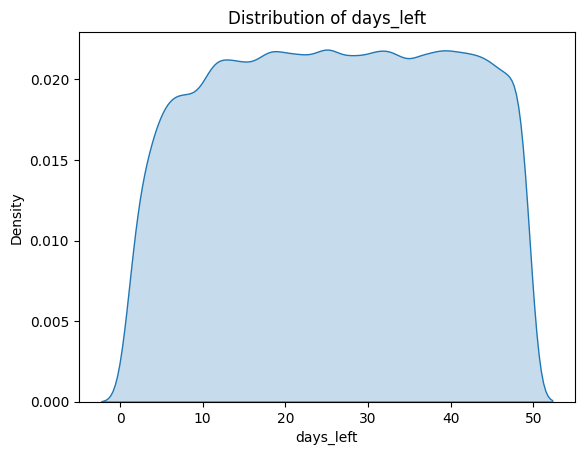

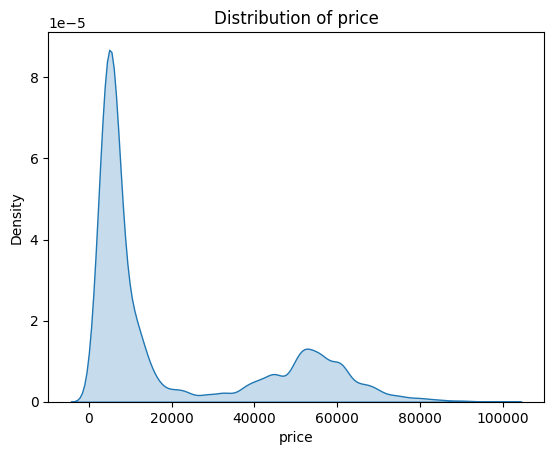

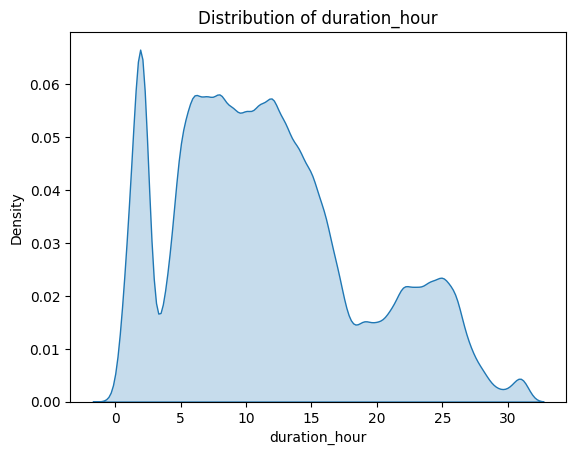

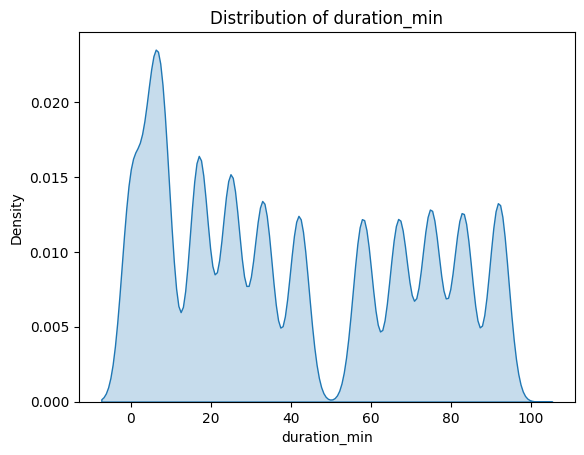

In [101]:
for i in df.select_dtypes(include='number'):
  sns.kdeplot(df[i],fill=True)
  plt.title(f'Distribution of {i}')
  plt.show()

In [102]:
for i in df.select_dtypes(include='number'):
  print(f'Skewness of {i}: {df[i].skew()}')

Skewness of days_left: -0.035464349550665804
Skewness of price: 1.0588298744874656
Skewness of duration_hour: 0.564337818613212
Skewness of duration_min: 0.28057442943297234


0.4043929524479189


<Axes: xlabel='price', ylabel='Density'>

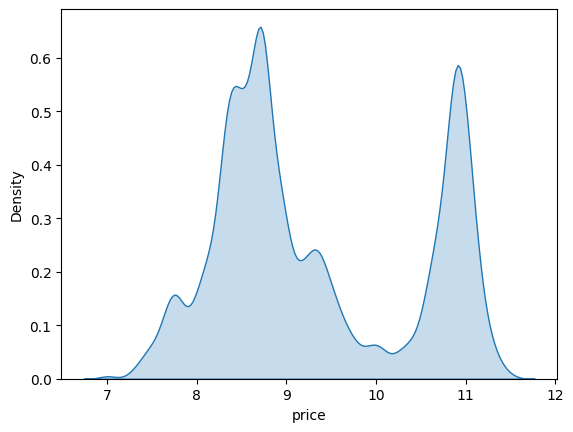

In [103]:
df['price']=np.log1p(df['price'])
print(df['price'].skew())
sns.kdeplot(df['price'],fill=True)

In [104]:
corr=df.select_dtypes(include='number').corr()
corr

,days_left,price,duration_hour,duration_min
days_left,1.000000,-0.193504,-0.038538,0.004391
price,-0.193504,1.000000,0.266131,-0.017337
duration_hour,-0.038538,0.266131,1.000000,-0.051766
duration_min,0.004391,-0.017337,-0.051766,1.000000


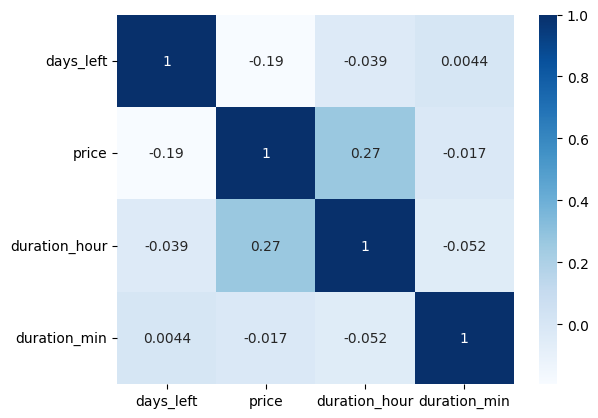

In [105]:
sns.heatmap(corr,cmap='Blues',annot=True)
plt.show()

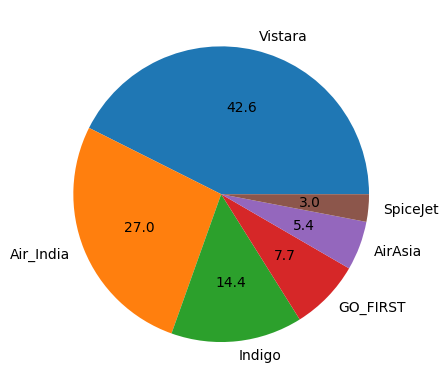

In [106]:
airline_count=df['airline'].value_counts()
plt.pie(airline_count,labels=airline_count.index,autopct='%.1f')
plt.show()

In [107]:
df.to_csv('cleaned_dataset.csv',index=False)